In [24]:
#下面这行代码，是为了把自己编写的代码文件当作一共模块导入，这里是把Utilities文件夹中的plotting.py文件当作python的模块导入，对应的是下面的from plotting import newfig, savefig。路径要随着不同设备的系统做相应的修改
import sys #导入sys模块。sys模块提供了一些变量和函数，用于与 Python解释器进行交互和访问。例如，sys.path 是一个 Python 在导入模块时会查找的路径列表，sys.argv 是一个包含命令行参数的列表，sys.exit() 函数可以用于退出 Python 程序。导入 sys 模块后，你就可以在你的程序中使用这些变量和函数了。
# sys.path.insert(0, '../../../Utilities/') #在 Python的sys.path列表中插入一个新的路径。sys.path是一个 Python 在导入模块时会查找的路径列表。新的路径'../../Utilities/'相对于当前脚本的路径。当你尝试导入一个模块时，Python 会在 sys.path 列表中的路径下查找这个模块。通过在列表开始位置插入一个路径，你可以让 Python 优先在这个路径下查找模块。这在你需要导入自定义模块或者不在 Python 标准库中的模块时非常有用。

import torch
#collections是python一个内置模块，提供了一些有用的数据结构
from collections import OrderedDict  #这个类是字典dict的一个子类，用于创建有序的字典。普通字典中元素顺序是无序的，在OrderedDict中元素的顺序是有序的，元素的顺序是按照它们被添加到字典中的顺序决定的。

from pyDOE import lhs #`pyDOE`是一个Python库，用于设计实验。它提供了一些函数来生成各种设计，如因子设计、拉丁超立方设计等。`lhs`是库中的一个函数，全名为"Latin Hypercube Sampling"，拉丁超立方采样。这是一种统计方法，用于生成一个近似均匀分布的多维样本点集。它在参数空间中生成一个非常均匀的样本，这对于高维数值优化问题非常有用，因为它可以更好地覆盖参数空间。
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #导入了scipy库中的io模块。scipy.io模块包含了一些用于文件输入/输出的函数，例如读取和写入.mat文件（MATLAB格式）
from scipy.interpolate import griddata #`scipy.interpolate`是`scipy`库中的一个模块，提供了许多插值工具，用于在给定的离散数据点之间进行插值和拟合。`griddata`是这个模块中的一个函数，用于在无规则的数据点上进行插值。

import random

import skopt #用于优化问题的库，特别是机器学习中的超参数优化
from distutils.version import LooseVersion #distutils是Python的一个标准库，用于构建和安装Python包。LooseVersion是一个类，用于比较版本号


# from plotting_torch import newfig, savefig #从自定义的plotting_torch.py文件中导入了newfig和savefig函数。这两个函数用于创建和保存图形。这两个函数的定义在plotting_torch.py文件中

from mpl_toolkits.axes_grid1 import make_axes_locatable #`mpl_toolkits.axes_grid1`是`matplotlib`库的一个模块，提供了一些高级的工具来控制matplotlib图形中的坐标轴和颜色条。`make_axes_locatable`是模块中的一个函数，用于创建一个可分割的坐标轴。可以在这个坐标轴的四个方向（上、下、左、右）添加新的坐标轴或颜色条。
import matplotlib.gridspec as gridspec #是`matplotlib`库的一个模块，用于创建一个网格布局来放置子图。在`matplotlib`中可以创建一个或多个子图（subplot），每个子图都有自己的坐标轴，并可以在其中绘制图形。`gridspec`模块提供了一个灵活的方式来创建和放置子图。
import time #一个内置模块，用于处理时间相关的操作。


from tqdm import tqdm #一个快速，可扩展的python进度条库，可以在python长循环中添加一个进度提示信息，用户只需要封装任意的迭代器tqdm(iterator)。

import seaborn as sns  # 导入seaborn库用于绘制密度图

from sklearn.cluster import KMeans #sklearn是一个广泛使用的机器学习库，提供了各种算法和工具用于数据挖掘和分析。Kmeans是聚类算法，用于将数据分成预先指定数量的簇
import faiss #一种高效的相似性搜索和密集向量聚类库，适用于在大规模数据中进行高维向量的搜索和聚类操作
#faiss的安装方法：conda install -c conda-forge faiss-gpu
import matplotlib.cm as cm

In [25]:
#这里chaosss表示使用最后20步的平均距离，而chaos也是，但是忘记对混沌度归一化了，检查发现混沌度不归一化相对残差会很小，但是意外的效果很好，不知道为啥

In [26]:
import re
import pandas as pd

# 示例数据
methods_data = {
    'f': """
    [0.9813469770655603, 0.9753366626371188, 0.5951493483160423, 0.9380929142368666, 0.9053109123969771, 0.0684616479266529, 0.8001014466990417, 0.055412936751891434, 0.5300683499282848, 0.14541517746510957]
    Error u of fuhe active learning(LHS sampling): 5.994696e-01
    [0.5305324753046694, 0.5248534879077212, 0.2083447623727218, 0.49518747031647836, 0.46637482618812515, 0.013925896493325011, 0.37992218178552517, 0.0111752759563895, 0.20409588777695614, 0.014560017719640831]
    MAE of fuhe active learning(LHS sampling): 2.848972e-01
    [0.43855498662192666, 0.43319952783003773, 0.16129867516171828, 0.4007472831002128, 0.37322814481801997, 0.002134388995047845, 0.2915204239524202, 0.0013983027448985941, 0.12795068715257932, 0.009629380563195648]
    MSE of fuhe active learning(LHS sampling): 2.239662e-01
    """,
    # 'd': """
    # [0.22014405282155222, 0.017088425462524055, 0.2700462614632933, 0.7765357961464767, 0.9887145773035583, 0.9883530499262538, 0.13313409232484127, 0.16925893420223462, 0.2153009149047111, 0.0161302268742093]
    # Error u of fuhe active learning(LHS sampling): 3.794706e-01
    # [0.030139839072874163, 0.003179639640458109, 0.06805228896311472, 0.3640800520548031, 0.539757781882677, 0.5365378914917275, 0.016562593140568144, 0.03253115704076683, 0.044888529411547994, 0.003345054246078074]
    # MAE of fuhe active learning(LHS sampling): 1.639075e-01
    # [0.022069515068557595, 0.00013297897232598656, 0.03320895533307722, 0.2746008240127211, 0.4451647319208463, 0.4448392389673475, 0.008071559247476153, 0.013046141338551556, 0.021109144177701655, 0.000118484032673059]
    # MSE of fuhe active learning(LHS sampling): 1.262362e-01
    # """,
    # 'dd': """
    # [0.02818363108030948, 0.9263386058757658, 0.0494119536114942, 0.891575103015526, 0.31962275670702683, 0.9912003255211642, 0.14043836086347816, 0.034384884986696646, 0.956289481929145, 0.8674995358319431]
    # Error u of fuhe active learning(LHS sampling): 5.204945e-01
    # [0.006190211838055337, 0.4838094842027726, 0.0118505893791421, 0.46851038073212625, 0.08837623224354933, 0.5387287789728634, 0.018327108205242443, 0.0055935406915752165, 0.5109109717136874, 0.4397418868599543]
    # MAE of fuhe active learning(LHS sampling): 2.572039e-01
    # [0.00036172020328464265, 0.39076747037217885, 0.0011118416160515534, 0.36198847225278863, 0.04652155913652019, 0.4474059418446018, 0.008981531127358009, 0.0005384111281945341, 0.4164449822774142, 0.3427025829333373]
    # MSE of fuhe active learning(LHS sampling): 2.016825e-01
    # """,
    # 'pd': """
    # [0.9563925132729852, 0.9795432641566295, 0.9843360119130313, 0.5310331509236054, 0.5499819168987296, 0.011730212860787568, 0.010239698753852963, 0.0675074959763865, 0.9757312054398242, 0.9744661821839024]
    # Error u of fuhe active learning(LHS sampling): 6.040962e-01
    # [0.5131470413837284, 0.5257991366146004, 0.535082459070643, 0.1891712790664828, 0.21562492205096673, 0.0024812743267278795, 0.0023961457160242704, 0.00863803705604942, 0.5283858507832688, 0.5252045328181726]
    # MAE of fuhe active learning(LHS sampling): 3.045931e-01
    # [0.4165347232991036, 0.43694434256599574, 0.44123059984181207, 0.1284168885244504, 0.13774495333958717, 6.26600391128547e-05, 4.7747785674846974e-05, 0.002075309499152441, 0.43355007412195196, 0.4324266184131553]
    # MSE of fuhe active learning(LHS sampling): 2.429034e-01
    # """,
    'f+qf+r+c': """
    [0.0024771764343731063, 0.0048000342695453556, 0.002703518910665728, 0.005841471610315474, 0.0018433419316947542, 0.0019390163043488382, 0.0017595717382733614, 0.0024797759628009002, 0.0014783335735052726, 0.001401926851427393]
    Error u of fuhe active learning(LHS sampling): 2.672417e-03
    [0.00041290430533344024, 0.0006884685392972895, 0.0005251188791774388, 0.001572628682710307, 0.0003233916506616035, 0.0006211754490918562, 0.0005451668213997481, 0.00046156759938133744, 0.00037007050383825677, 0.0005317655240660335]
    MAE of fuhe active learning(LHS sampling): 6.052258e-04
    [2.315943454645556e-06, 8.695663951320436e-06, 2.75849940949375e-06, 1.2878302217731222e-05, 1.2824069901346807e-06, 1.4189823503238834e-06, 1.168498145705158e-06, 2.320806668764929e-06, 8.248195609039247e-07, 7.417623396246443e-07]
    MSE of fuhe active learning(LHS sampling): 3.440569e-06
    """,
    'f+r': """
    [0.9860101256258622, 0.9672454161485763, 0.12503180554525514, 0.8376197458637002, 0.14935432269688326, 0.9618638588969345, 0.16270579184083117, 0.048786666929865274, 0.5234254772843617, 0.35022787566362534]
    Error u of fuhe active learning(LHS sampling): 5.112271e-01
    [0.535222926145394, 0.5221933517699382, 0.01651938446094937, 0.4066040650083626, 0.032255172715576264, 0.5192467070159992, 0.033733667963537106, 0.008658235816062926, 0.1748456651559543, 0.07922171691415573]
    MAE of fuhe active learning(LHS sampling): 2.328501e-01
    [0.4427327258171475, 0.42604182464860363, 0.007119014557120699, 0.3195013437429983, 0.010158146431238687, 0.4213141925844529, 0.012055490943439983, 0.0010838799244768467, 0.12476379918049499, 0.055857345804503945]
    MSE of fuhe active learning(LHS sampling): 1.820628e-01
    """,
    # 'd+wqf+r': """
    # [0.04732007807076122, 0.023163233623508053, 0.5056488191694972, 0.3092386979194327, 0.24064392295467865, 0.9404438553939956, 0.38845872189188657, 0.24223667806632046, 0.867857949895689, 0.2569954999189379]
    # Error u of fuhe active learning(LHS sampling): 3.822007e-01
    # [0.012370642114030285, 0.0033334404714187083, 0.17576158821360374, 0.054590202286151565, 0.053178012218900415, 0.47744883806426036, 0.10803081987389594, 0.03938511213105189, 0.439979840360738, 0.05422614107866164]
    # MAE of fuhe active learning(LHS sampling): 1.418305e-01
    # [0.001019693804191295, 0.00024433025625013945, 0.11643320983837294, 0.04354783286532602, 0.02637112595934363, 0.4027584139817352, 0.0687177022536173, 0.02672136748958812, 0.34298582181540876, 0.030076681236047568]
    # MSE of fuhe active learning(LHS sampling): 1.058876e-01
    # """,
    # 'dd+wqf+r': """
    # [0.9589497177747958, 0.4944908393595329, 0.5757094392271117, 0.11599227291764798, 0.7719996189200936, 0.9598551511232479, 0.0943390942602731, 0.1827218814917887, 0.028732337494732647, 0.1082176832446328]
    # Error u of fuhe active learning(LHS sampling): 4.291008e-01
    # [0.5152182851071585, 0.17965633065606101, 0.227641889515873, 0.0305731076296524, 0.35450532577179783, 0.5066490626936688, 0.026020006709322283, 0.03276866109393957, 0.005520477932065919, 0.019265525582870292]
    # MAE of fuhe active learning(LHS sampling): 1.897819e-01
    # [0.41876516419943055, 0.1113513217673528, 0.15093347662886858, 0.00612684640307469, 0.2714020023269531, 0.4195563275727007, 0.004052866329064383, 0.015204074626172877, 0.0003759419534014251, 0.005333046125534373]
    # MSE of fuhe active learning(LHS sampling): 1.403101e-01
    # """,
    # 'pd+wqf+r': """
    # [0.03298878686727834, 0.98617173326147, 0.8165479554277099, 0.12989366641177708, 0.007098267586402884, 0.784601070114932, 0.2498590443637793, 0.17726360762029061, 0.7635461812468535, 0.14406425915280127]
    # Error u of fuhe active learning(LHS sampling): 4.092035e-01
    # [0.007683737836699709, 0.5332520815902915, 0.3910642626381374, 0.016998420789384176, 0.0018032733900640557, 0.3731072544599647, 0.049943055572320115, 0.028354566322550293, 0.35851924034905547, 0.020573733658320215]
    # MAE of fuhe active learning(LHS sampling): 1.781300e-01
    # [0.0004955774830358675, 0.44287786601525825, 0.30362831324519063, 0.0076834244714187455, 2.2944764773691874e-05, 0.2803345770041361, 0.02842948710766613, 0.014309288599839513, 0.2654908111541862, 0.009451296242895691]
    # MSE of fuhe active learning(LHS sampling): 1.352724e-01
    # """,


    'f+qf': """
    [0.9766227086363187, 0.9554230839682205, 0.15128002565801857, 0.963959811674296, 0.08935456491059804, 0.03095619569151628, 0.5661695501728032, 0.2590682710926763, 0.6971085630663155, 0.807879662083381]
    Error u of fuhe active learning(LHS sampling): 5.497822e-01
    [0.5259318813381144, 0.5013652158574332, 0.02595847648793546, 0.5189297528866137, 0.013950010541992384, 0.006098728933431941, 0.21723440785844797, 0.07657926358530853, 0.30884773388133546, 0.4012968953590046]
    MAE of fuhe active learning(LHS sampling): 2.596192e-01
    [0.43434268554608885, 0.41569072607205565, 0.01042178368085958, 0.42315232540452563, 0.0036359036365927275, 0.0004363892486994806, 0.14597278442085282, 0.030563798596038534, 0.2212991320209463, 0.29721602790320417]
    MSE of fuhe active learning(LHS sampling): 1.982732e-01
    """,
    # 'd+qf': """
    # [0.2450970916205036, 0.519428133385012, 0.24848183665889986, 0.4942615046607787, 0.05410958018264137, 0.9226400337726409, 0.451798975247447, 0.30829401233874254, 0.5548126378252641, 0.13716573706340746]
    # Error u of fuhe active learning(LHS sampling): 3.936090e-01
    # [0.053772057862046446, 0.16906318408555263, 0.07521816232734206, 0.17049486382054568, 0.014493587092213185, 0.4758018934518162, 0.14029585317237522, 0.07999378232299258, 0.21123912754555557, 0.01519503322251414]
    # MAE of fuhe active learning(LHS sampling): 1.405568e-01
    # [0.027356163530640333, 0.12286546032194344, 0.028116947663887996, 0.11124806080436775, 0.0013332979284218845, 0.38765328214086325, 0.0929542730035043, 0.04328217288947305, 0.14017532308009684, 0.008567816541327837]
    # MSE of fuhe active learning(LHS sampling): 9.635528e-02
    # """,
    # 'dd+qf': """
    # [0.7994415437324521, 0.051106726415361445, 0.4289123565372651, 0.40426603834441305, 0.3705681391511478, 0.9684518844190791, 0.7597765632209197, 0.29821637478672824, 0.8004605678263003, 0.2645069063163986]
    # Error u of fuhe active learning(LHS sampling): 5.145707e-01
    # [0.37686239411409295, 0.00937914069226905, 0.13625482763503233, 0.11880956291024806, 0.1157448318044761, 0.5106061486014674, 0.356099449069554, 0.07006041162230221, 0.3914247101526992, 0.07584850746881815]
    # MAE of fuhe active learning(LHS sampling): 2.161090e-01
    # [0.291039745257635, 0.0011894193587617952, 0.08377529996583244, 0.07442406592967825, 0.06253383002355431, 0.4271053117444186, 0.2628758325033298, 0.04049877141355459, 0.29178217735562234, 0.03186052351047852]
    # MSE of fuhe active learning(LHS sampling): 1.567085e-01
    # """,
    # 'pd+qf': """
    # [0.9485578013177273, 0.9847998643701139, 0.9672526029504768, 0.42726349716239975, 0.03711017267723337, 0.030262886229470886, 0.28662962903155337, 0.3187438009275868, 0.9884275575067567, 0.5696159979426121]
    # Error u of fuhe active learning(LHS sampling): 5.558664e-01
    # [0.5044739306283904, 0.5316253841170809, 0.5194794000779396, 0.14339146915554404, 0.0076473635266025635, 0.007224196686172371, 0.06887353253381691, 0.08577289927468887, 0.5377764706918303, 0.2308956805126358]
    # MAE of fuhe active learning(LHS sampling): 2.637160e-01
    # [0.4097382195237728, 0.4416465434182934, 0.42604815580204053, 0.08313242654746657, 0.0006271404681579743, 0.0004170609861982736, 0.03741287119103807, 0.04626604435505328, 0.44490631043476847, 0.14775535574207213]
    # MSE of fuhe active learning(LHS sampling): 2.037950e-01
    # """,
    'f+r+c': """
    [0.9784921941718185, 0.9809074158573855, 0.023558314284566853, 0.9544332736110277, 0.020923158292094797, 0.237145744875363, 0.1491954183476006, 0.032185305733053095, 0.8887742256969996, 0.721419874559881]
    Error u of fuhe active learning(LHS sampling): 4.987035e-01
    [0.5331864331857101, 0.5313909451567121, 0.005451339549508343, 0.5091678317278644, 0.0039951279235446845, 0.058805721237493655, 0.023236840623153083, 0.006700084207005754, 0.45862728169861966, 0.32236223241792533]
    MAE of fuhe active learning(LHS sampling): 2.452924e-01
    [0.436007145194325, 0.43816220284314594, 0.0002527361107821808, 0.41482986796429955, 0.00019935785715192138, 0.025609998231626963, 0.01013654257102487, 0.00047173071359453287, 0.3597176759035502, 0.237003675274058]
    MSE of fuhe active learning(LHS sampling): 1.922391e-01
    """,
    
    'f+qf+r': """
    [0.9771304196449048, 0.9656446844679434, 0.14079426749906296, 0.9760028754343021, 0.15641587953708125, 0.477799720111976, 0.24146406641295312, 0.07546811212682623, 0.5007253160137956, 0.5648022011256143]
    Error u of fuhe active learning(LHS sampling): 5.076248e-01
    [0.5269199510599847, 0.5098503558283914, 0.025518519025008755, 0.5244213654965368, 0.031870527833243824, 0.16508726112757752, 0.05435840882339328, 0.014059928849990121, 0.1670737217548387, 0.22286015212705673]
    MAE of fuhe active learning(LHS sampling): 2.242020e-01
    [0.43479440120117935, 0.42463284546244573, 0.009027111793340576, 0.4337915318974362, 0.011141420294575011, 0.10396105008327822, 0.026551184211154523, 0.0025936170206914506, 0.11417682817064931, 0.14526856171220603]
    MSE of fuhe active learning(LHS sampling): 1.705939e-01
    """,
    # 'd+qf+r': """
    # [0.04042165643470667, 0.11176882350725885, 0.1554026904530788, 0.5934915881832201, 0.3477483929073017, 0.9691230154868511, 0.09162232104814762, 0.608091862643945, 0.5914375891232362, 0.22292681327555805]
    # Error u of fuhe active learning(LHS sampling): 3.732035e-01
    # [0.009659392219600707, 0.01148697880884917, 0.03374718934888113, 0.22057256903244807, 0.10731026114147556, 0.5220724313026421, 0.012561536438930657, 0.2466105179003308, 0.24528941422002237, 0.046257735674919385]
    # MAE of fuhe active learning(LHS sampling): 1.455568e-01
    # [0.0007440585103954924, 0.0056887943533841506, 0.010997549927013628, 0.1604013470991666, 0.055069247080122494, 0.42769747944971664, 0.0038227989183717307, 0.1683903730823702, 0.15929301092122486, 0.02263098679612835]
    # MSE of fuhe active learning(LHS sampling): 1.014736e-01
    # """,
    # 'dd+qf+r': """
    # [0.2896541729170752, 0.574916987933803, 0.6832400915939432, 0.5622796323295587, 0.10736142817676673, 0.9430538350200774, 0.21209356965768766, 0.20142116242178612, 0.5368291164673316, 0.21168166025835494]
    # Error u of fuhe active learning(LHS sampling): 4.322532e-01
    # [0.07934827050312476, 0.22711595931501727, 0.2844585568884602, 0.21321905222721255, 0.014639215470384052, 0.4914881353075308, 0.031451182728651696, 0.03800585799464178, 0.20686191083483652, 0.04538162389615915]
    # MAE of fuhe active learning(LHS sampling): 1.631970e-01
    # [0.038206605546905095, 0.15051824942526323, 0.21258154544080105, 0.1439738372767522, 0.005248986256705971, 0.4049970376169804, 0.020484901438021858, 0.01847519672633398, 0.13123540067643835, 0.020405410770148423]
    # MSE of fuhe active learning(LHS sampling): 1.146127e-01
    # """,
    # 'pd+qf+r': """
    # [0.9715847636162975, 0.9741642534906174, 0.7866708666081369, 0.7333453182066184, 0.24579056775557007, 0.162930863469839, 0.3181515159100166, 0.24970895005319851, 0.6214108527354318, 0.28360636362070224]
    # Error u of fuhe active learning(LHS sampling): 5.347364e-01
    # [0.5211132994646134, 0.5238118308219326, 0.33828369874905434, 0.32093474436891756, 0.05506892919123071, 0.02983967850434549, 0.06915121893013382, 0.05427319970061657, 0.229382028006974, 0.06066386570863887]
    # MAE of fuhe active learning(LHS sampling): 2.202522e-01
    # [0.42987309742718877, 0.4321586937184783, 0.28181558661315037, 0.2449040250865287, 0.02751118523592046, 0.01208886683803023, 0.046094262345915314, 0.028395341274605117, 0.1758476395797633, 0.036627798669383836]
    # MSE of fuhe active learning(LHS sampling): 1.715316e-01
    # """,


    # 'f+qf+cc': """
    # [0.0036229036106066276, 0.0038685800639825744, 0.0010218622578794991, 0.0034851037584339136, 0.005615921453679316, 0.015881091176696626, 0.006052061406578071, 0.0121845492726194, 0.0030890207547194593, 0.003139499442695193]
    # Error u of fuhe active learning(LHS sampling): 5.796059e-03
    # [0.0011654595158830093, 0.00042485309293049516, 0.0004065021407643414, 0.0007201724912701334, 0.0009086050390901726, 0.0015043189127639692, 0.001962326434618527, 0.001615446212013441, 0.0010960440388141164, 0.0008013489030754923]
    # MAE of fuhe active learning(LHS sampling): 1.060508e-03
    # [4.9536763786544915e-06, 5.648293435004694e-06, 3.940930624790452e-07, 4.584009370263213e-06, 1.1902991453590815e-05, 9.518636673508145e-05, 1.382358615628058e-05, 5.603159804210889e-05, 3.6012703417224073e-06, 3.7199310693998124e-06]
    # MSE of fuhe active learning(LHS sampling): 1.998458e-05
    # """,
    # 'd+qf+cc': """
    # [0.0019275508581900471, 0.008401101094131985, 0.39009396939607166, 0.009365983725771226, 0.005721439682248373, 0.009538924747841133, 0.010296991092902096, 0.00435844572043775, 0.0017283873143623025, 0.03951834208268972]
    # Error u of fuhe active learning(LHS sampling): 4.809511e-02
    # [0.0007095427993418748, 0.0016500689616454258, 0.15132643804426826, 0.0014965780323856926, 0.000734256180343558, 0.0012452771945630121, 0.0017983482584486806, 0.0008292073750683374, 0.0005547399506519365, 0.006042555778248431]
    # MAE of fuhe active learning(LHS sampling): 1.663870e-02
    # [1.4022510155351802e-06, 2.6637072541559063e-05, 0.057431815445410234, 3.310707933198824e-05, 1.2354487076410672e-05, 3.4340998390696186e-05, 4.001609873726559e-05, 7.1693099277894925e-06, 1.1274471991885692e-06, 0.0005894018632518025]
    # MSE of fuhe active learning(LHS sampling): 5.817737e-03
    # """,
    # 'dd+qf+cc': """
    # [0.18421235439807043, 0.007694384489799012, 0.18729701148097452, 0.006426343072259943, 0.0038046610801097487, 0.003319877497674225, 0.01690273525974729, 0.002286593602243911, 0.006583389242360814, 0.008311833398779422]
    # Error u of fuhe active learning(LHS sampling): 4.268392e-02
    # [0.048163432176574074, 0.001141094426569071, 0.041852601357071056, 0.0007921703084864566, 0.0008053518763723614, 0.0005180707133590163, 0.002529756489824472, 0.0010609808110248987, 0.0007722402322158218, 0.0010485803236811703]
    # MAE of fuhe active learning(LHS sampling): 9.868428e-03
    # [0.012807122936442056, 2.234404721617918e-05, 0.01323962753550801, 1.5586258880687022e-05, 5.463186461142546e-06, 4.159663402667973e-06, 0.00010782713115802233, 1.9732951110528603e-06, 1.6357357245629505e-05, 2.6074004205787318e-05]
    # MSE of fuhe active learning(LHS sampling): 2.624654e-03
    # """,
    # 'pd+qf+cc': """
    # [0.010612073362834705, 0.010689128320846543, 0.005858065567287892, 0.06163885965111808, 0.0036150852583693993, 0.009717356914561649, 0.005595891664679995, 1.0583041810188685, 0.006423876196314455, 0.003613908256789206]
    # Error u of fuhe active learning(LHS sampling): 1.176068e-01
    # [0.0027750020936091564, 0.002091563766038584, 0.0011940614806080915, 0.007828003922683228, 0.0011119418563521305, 0.0016401147704956224, 0.0009802236443826847, 0.5649614271660783, 0.000918175823905078, 0.0005737184122316853]
    # MAE of fuhe active learning(LHS sampling): 5.840742e-02
    # [4.250250813630034e-05, 4.312197597583634e-05, 1.2951573318029499e-05, 0.0014339145209182277, 4.932319036005163e-06, 3.563775852520544e-05, 1.181823626465082e-05, 0.4227027717720284, 1.5574295004213437e-05, 4.929107824191129e-06]
    # MSE of fuhe active learning(LHS sampling): 4.243082e-02
    # """,

}

# 定义读取数据的函数
def extract_metrics(data):
    # 使用正则表达式提取数据
    error_u = re.findall(r'\[([^\]]+)\]', data)[0]
    mae = re.findall(r'\[([^\]]+)\]', data)[1]
    mse = re.findall(r'\[([^\]]+)\]', data)[2]
    
    # 将字符串转换为浮点数列表
    error_u = list(map(float, error_u.split(',')))
    mae = list(map(float, mae.split(',')))
    mse = list(map(float, mse.split(',')))
    
    return error_u, mae, mse

# 定义处理所有方法数据的函数
def process_methods_data(methods_data):
    data = {
        'Method': [],
        'Metric': [],
        'Values': []
    }
    
    for method, data_str in methods_data.items():
        error_u, mae, mse = extract_metrics(data_str)
        
        data['Method'].append(method)
        data['Metric'].append('Error_u')
        data['Values'].append(error_u)
        
        data['Method'].append(method)
        data['Metric'].append('MAE')
        data['Values'].append(mae)
        
        data['Method'].append(method)
        data['Metric'].append('MSE')
        data['Values'].append(mse)

    
    return pd.DataFrame(data)

# 处理方法数据并生成 DataFrame
df = process_methods_data(methods_data)

# 打印 DataFrame
print(df)

      Method   Metric                                             Values
0          f  Error_u  [0.9813469770655603, 0.9753366626371188, 0.595...
1          f      MAE  [0.5305324753046694, 0.5248534879077212, 0.208...
2          f      MSE  [0.43855498662192666, 0.43319952783003773, 0.1...
3   f+qf+r+c  Error_u  [0.0024771764343731063, 0.0048000342695453556,...
4   f+qf+r+c      MAE  [0.00041290430533344024, 0.0006884685392972895...
5   f+qf+r+c      MSE  [2.315943454645556e-06, 8.695663951320436e-06,...
6        f+r  Error_u  [0.9860101256258622, 0.9672454161485763, 0.125...
7        f+r      MAE  [0.535222926145394, 0.5221933517699382, 0.0165...
8        f+r      MSE  [0.4427327258171475, 0.42604182464860363, 0.00...
9       f+qf  Error_u  [0.9766227086363187, 0.9554230839682205, 0.151...
10      f+qf      MAE  [0.5259318813381144, 0.5013652158574332, 0.025...
11      f+qf      MSE  [0.43434268554608885, 0.41569072607205565, 0.0...
12     f+r+c  Error_u  [0.9784921941718185, 0.98090

In [27]:
# 筛选出 Metric 为 "Error_u" 的数据
error_u_df = df[df["Metric"] == "Error_u"]

# 转换为字典格式
loss_values = {row["Method"]: row["Values"] for _, row in error_u_df.iterrows()}

# 显示结果
methods = list(loss_values.keys())
seeds = range(len(next(iter(loss_values.values()))))

seeds = range(10)

print("Methods:", methods)
print("Seeds:", seeds)
print("Loss Values:", loss_values)

Methods: ['f', 'f+qf+r+c', 'f+r', 'f+qf', 'f+r+c', 'f+qf+r']
Seeds: range(0, 10)
Loss Values: {'f': [0.9813469770655603, 0.9753366626371188, 0.5951493483160423, 0.9380929142368666, 0.9053109123969771, 0.0684616479266529, 0.8001014466990417, 0.055412936751891434, 0.5300683499282848, 0.14541517746510957], 'f+qf+r+c': [0.0024771764343731063, 0.0048000342695453556, 0.002703518910665728, 0.005841471610315474, 0.0018433419316947542, 0.0019390163043488382, 0.0017595717382733614, 0.0024797759628009002, 0.0014783335735052726, 0.001401926851427393], 'f+r': [0.9860101256258622, 0.9672454161485763, 0.12503180554525514, 0.8376197458637002, 0.14935432269688326, 0.9618638588969345, 0.16270579184083117, 0.048786666929865274, 0.5234254772843617, 0.35022787566362534], 'f+qf': [0.9766227086363187, 0.9554230839682205, 0.15128002565801857, 0.963959811674296, 0.08935456491059804, 0.03095619569151628, 0.5661695501728032, 0.2590682710926763, 0.6971085630663155, 0.807879662083381], 'f+r+c': [0.9784921941718185

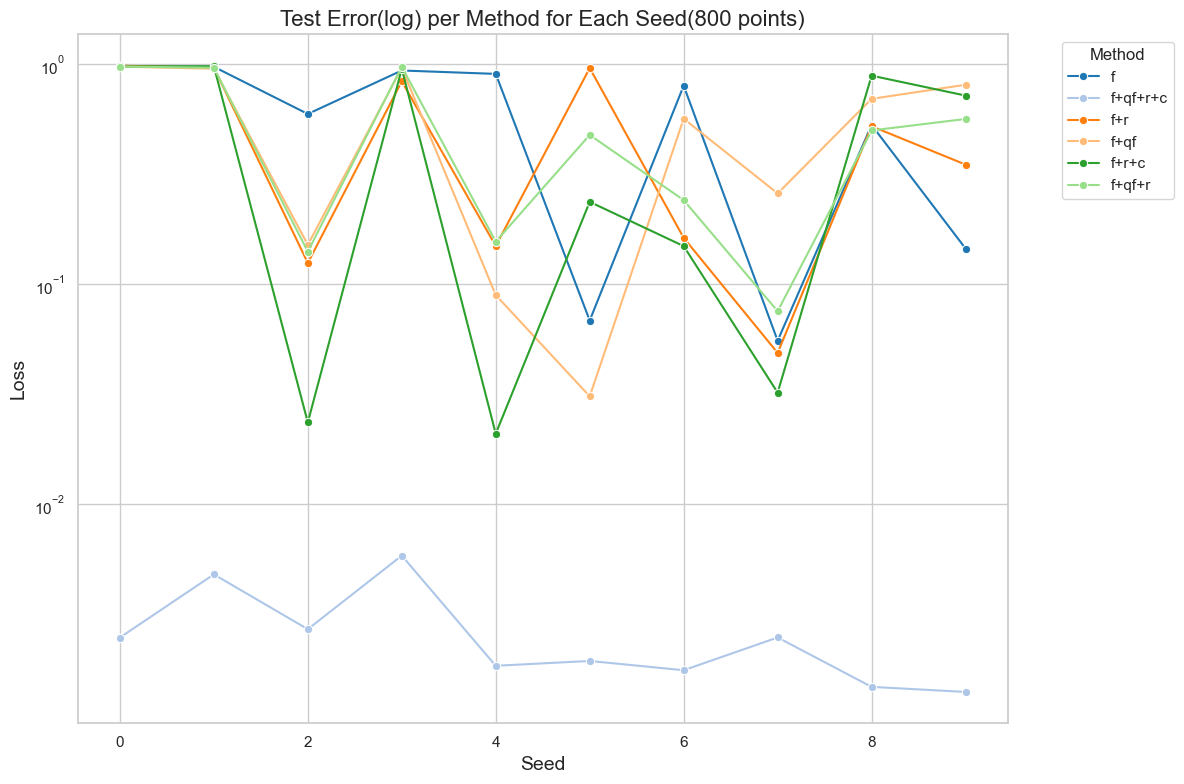

In [28]:
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

dd = pd.DataFrame(data)

# 确保方法按指定顺序排序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=dd, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')


# 设置纵坐标为对数尺度
plt.yscale('log')

# 3. 设置图形标题和标签

plt.title('Test Error(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

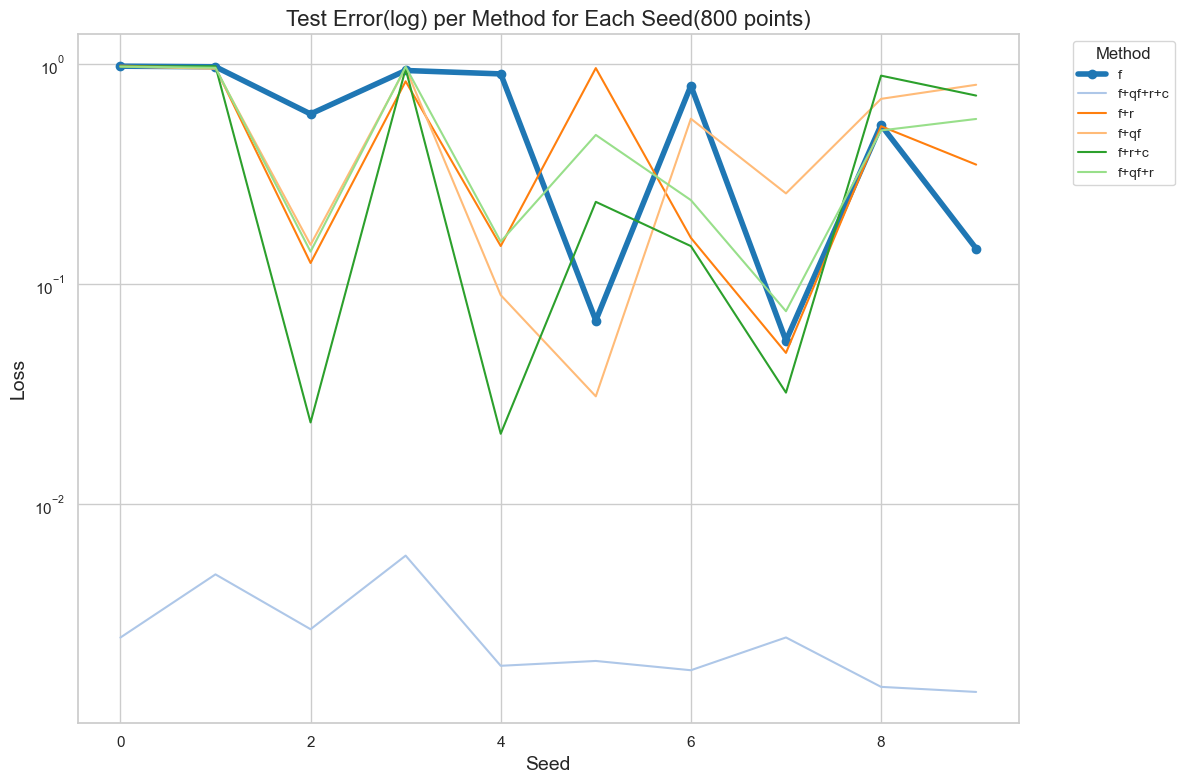

In [29]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'wqf+res','qf','f']
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = dd[dd['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )

# 设置纵坐标为对数尺度
plt.yscale('log')

# 4. 设置图形标题和标签
plt.title('Test Error(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

c:\Users\lcy\anaconda3\envs\pytorchgpu\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
c:\Users\lcy\anaconda3\envs\pytorchgpu\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
c:\Users\lcy\anaconda3\envs\pytorchgpu\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
c:\Users\lcy\anaconda3\envs\pytorchgpu\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
c:\Users\lcy\anaconda3\envs\pytorchgpu\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
c:\Users\lcy\anaconda3\envs\pytorch

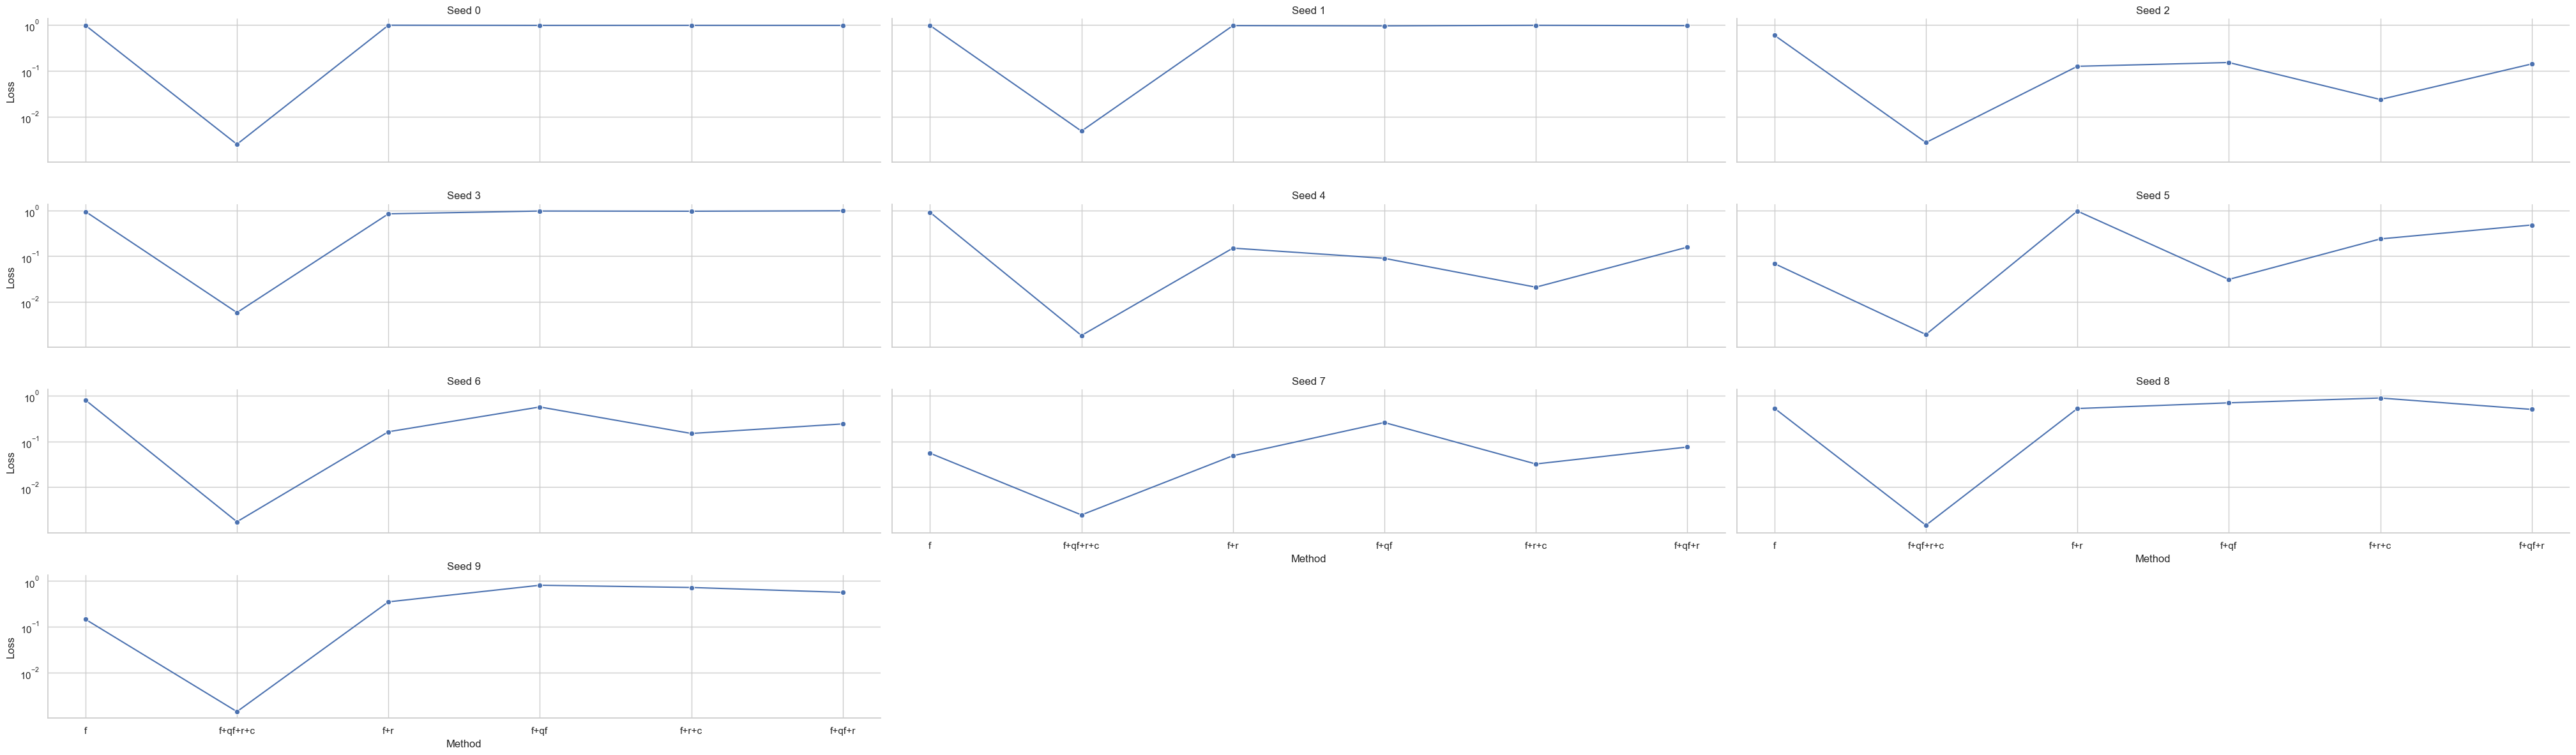

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 loss_values 是你存储所有方法和种子下的损失值的字典
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

dd = pd.DataFrame(data)

# 确保方法按指定顺序排序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 2. 创建 FacetGrid 来绘制每个 Seed 对应的图像
g = sns.FacetGrid(dd, col='Seed', col_wrap=3, height=3, aspect = 4.5, sharey=True)  # col_wrap 设置每行显示几幅

# 使用 lineplot 绘制每个图
g.map(sns.lineplot, 'Method', 'Loss', marker='o', palette='tab20')

# 设置纵坐标为对数尺度
g.set(yscale='log')

# 设置图形标题和标签
g.set_axis_labels('Method', 'Loss')
g.set_titles('Seed {col_name}')

# 调整图像布局
plt.tight_layout()

# 3. 显示图形
plt.show()


In [31]:
# 2. 计算每个列表的最小值
# .apply(min) 会将 min 函数应用到 'Values' 列的每一个元素（即每一个列表）
df['Min_Value'] = df['Values'].apply(min)

# 3. (可选但推荐) 创建一个透视表以便于查看
# index是行，columns是列，values是填充表格的值
result_pivot = df.pivot_table(index='Method', columns='Metric', values='Min_Value')


# --- 打印结果 ---
print("--- 包含最小值的完整列表 ---")
print(df[['Method', 'Metric', 'Min_Value']].to_string())

print("\n\n--- 整理后的透视表 (更推荐查看此表) ---")
print(result_pivot)

--- 包含最小值的完整列表 ---
      Method   Metric     Min_Value
0          f  Error_u  5.541294e-02
1          f      MAE  1.117528e-02
2          f      MSE  1.398303e-03
3   f+qf+r+c  Error_u  1.401927e-03
4   f+qf+r+c      MAE  3.233917e-04
5   f+qf+r+c      MSE  7.417623e-07
6        f+r  Error_u  4.878667e-02
7        f+r      MAE  8.658236e-03
8        f+r      MSE  1.083880e-03
9       f+qf  Error_u  3.095620e-02
10      f+qf      MAE  6.098729e-03
11      f+qf      MSE  4.363892e-04
12     f+r+c  Error_u  2.092316e-02
13     f+r+c      MAE  3.995128e-03
14     f+r+c      MSE  1.993579e-04
15    f+qf+r  Error_u  7.546811e-02
16    f+qf+r      MAE  1.405993e-02
17    f+qf+r      MSE  2.593617e-03


--- 整理后的透视表 (更推荐查看此表) ---
Metric     Error_u       MAE           MSE
Method                                    
f         0.055413  0.011175  1.398303e-03
f+qf      0.030956  0.006099  4.363892e-04
f+qf+r    0.075468  0.014060  2.593617e-03
f+qf+r+c  0.001402  0.000323  7.417623e-07
f+r       0

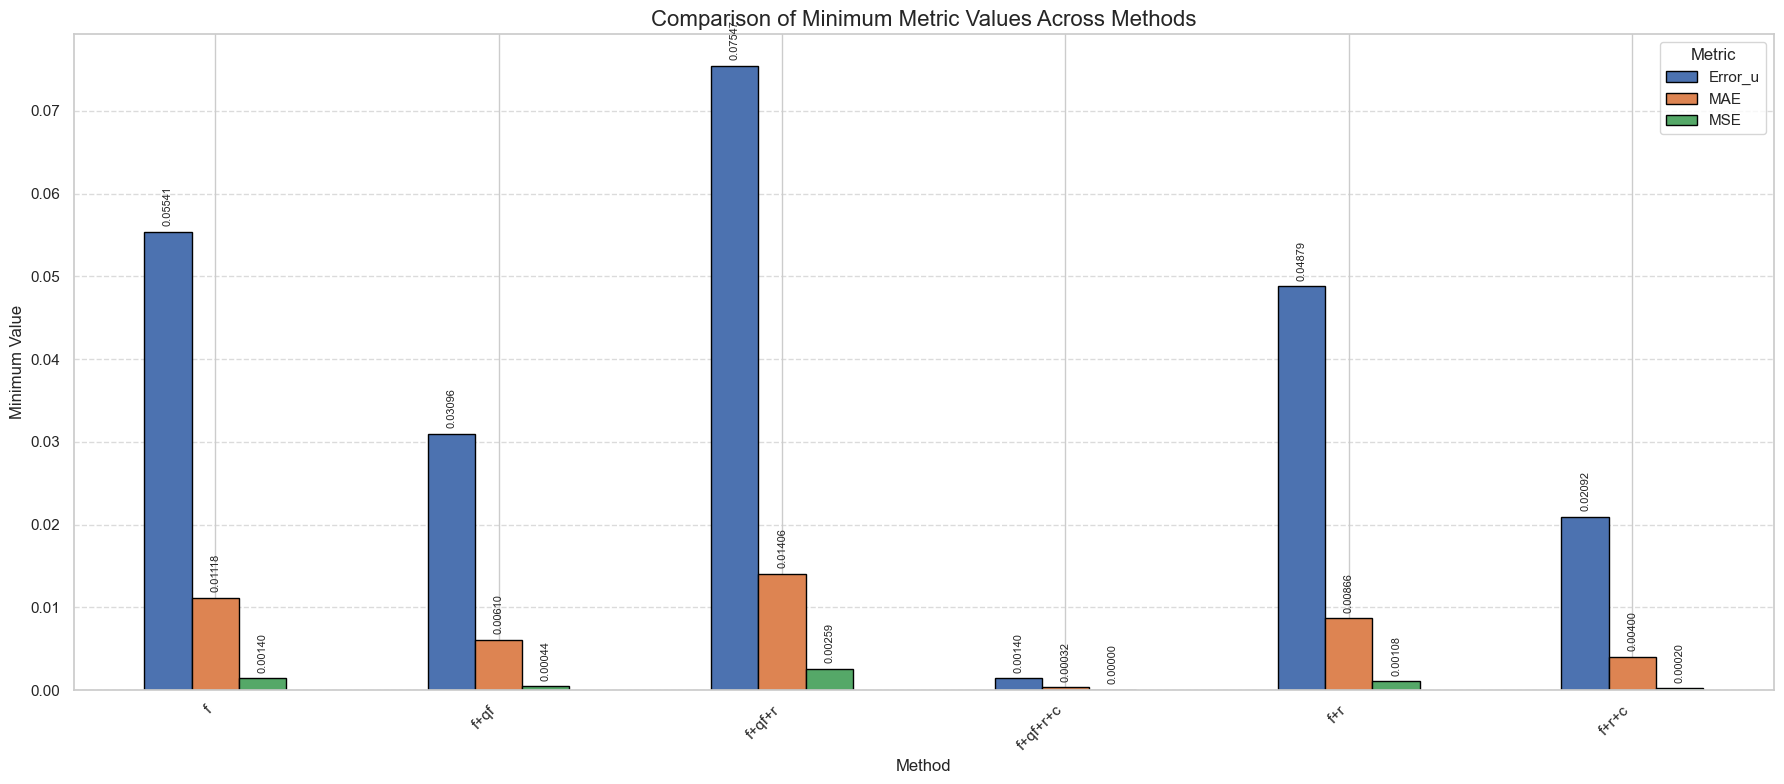

In [32]:
df['Min_Value'] = df['Values'].apply(min)
result_pivot = df.pivot_table(index='Method', columns='Metric', values='Min_Value')

# --- 2. 绘制分组条形图 ---
ax = result_pivot.plot(
    kind='bar', 
    figsize=(18, 8), # 设置图像大小
    edgecolor='black' # 给条形加上黑色边框，更清晰
)

# --- 3. 美化图表 ---
plt.title('Comparison of Minimum Metric Values Across Methods', fontsize=16) # 标题
plt.ylabel('Minimum Value', fontsize=12) # Y轴标签
plt.xlabel('Method', fontsize=12) # X轴标签
plt.xticks(rotation=45, ha='right') # X轴的标签旋转45度，防止重叠
plt.grid(axis='y', linestyle='--', alpha=0.7) # 添加水平网格线
plt.legend(title='Metric') # 显示图例

# 在每个条形图上显示数值
for container in ax.containers:
    ax.bar_label(container, fmt='%.5f', fontsize=8, rotation=90, padding=4)

plt.tight_layout() # 调整布局，防止标签被裁切
plt.show()

C:\Users\lcy\AppData\Local\Temp\ipykernel_232228\959944533.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


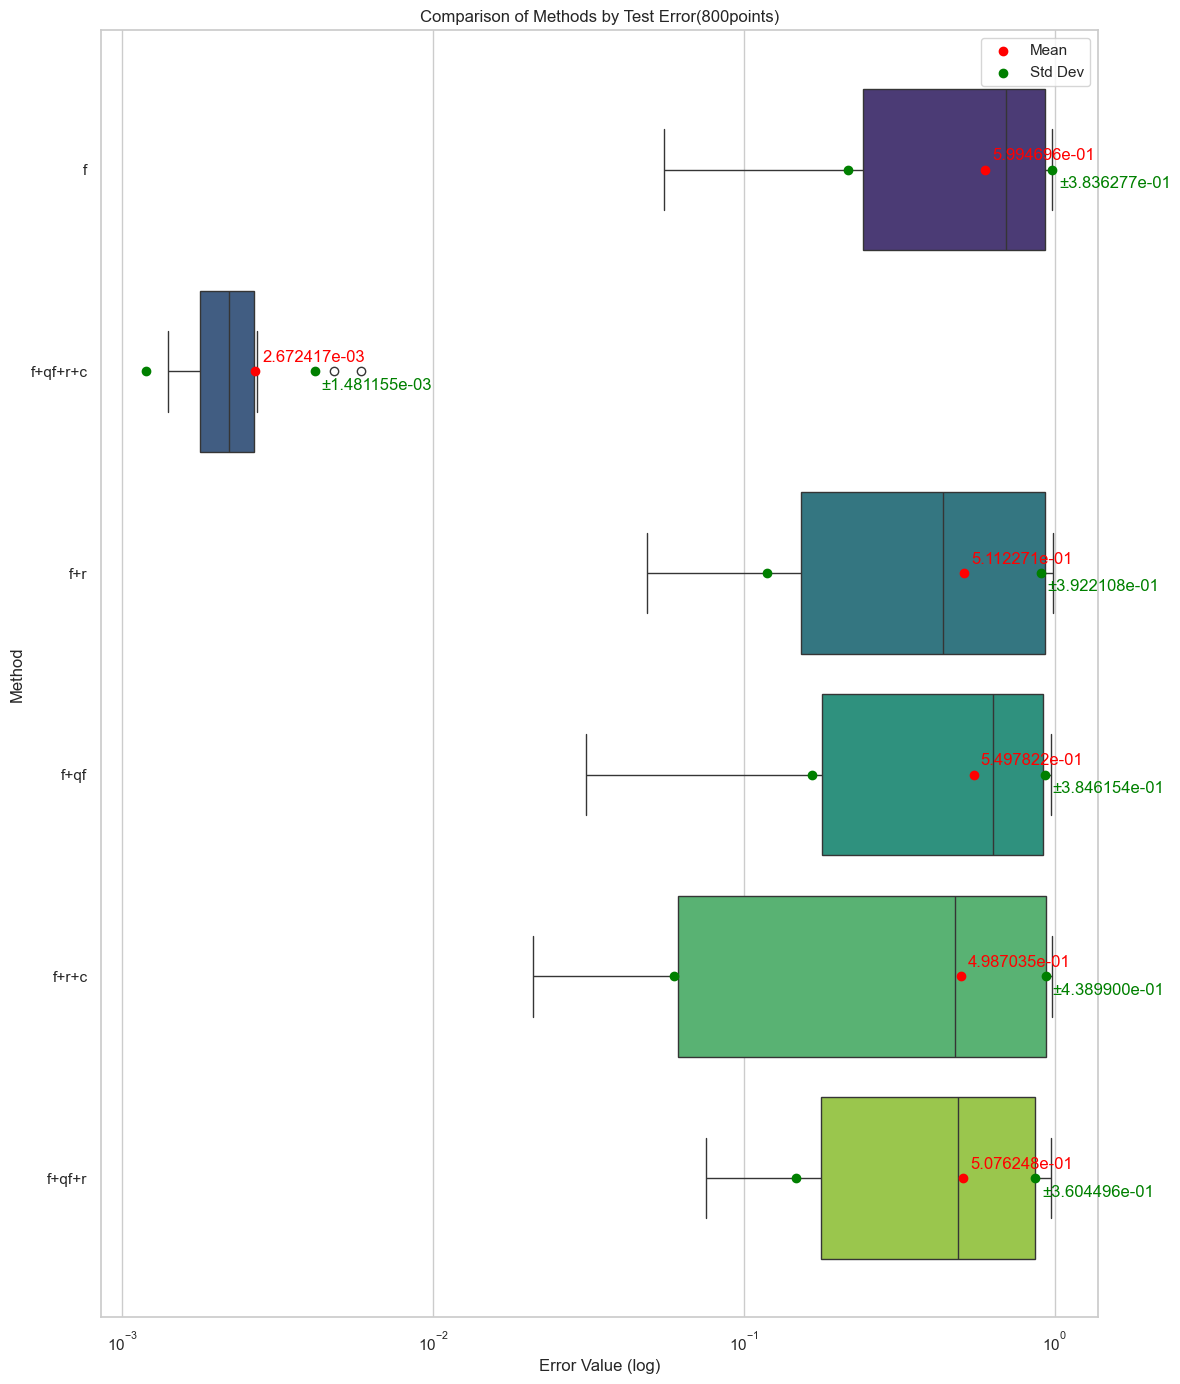

In [33]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


dd = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 14))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.6e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.6e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by Test Error(800points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

In [34]:
(2.70e-03-2.47e-03)/2.70e-03

0.08518518518518524

C:\Users\lcy\AppData\Local\Temp\ipykernel_232228\592110665.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


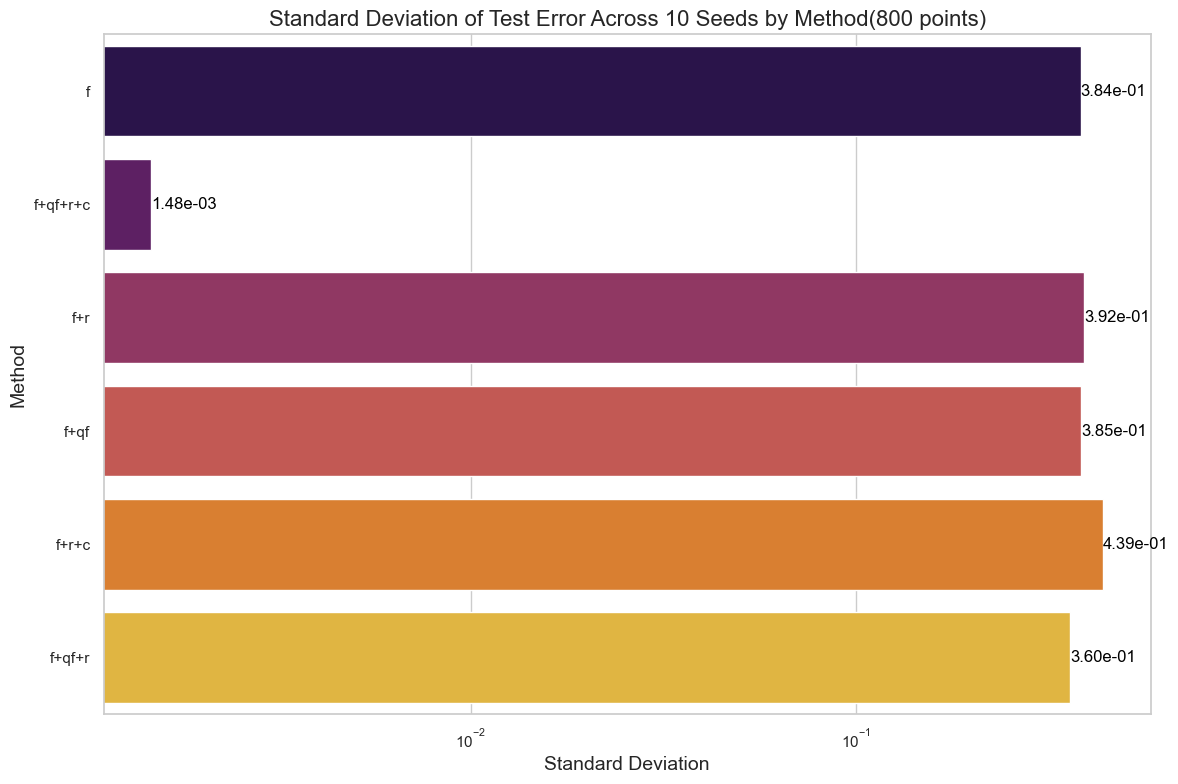

In [35]:
# 计算每种方法在10个seed下的标准差
std_df = dd.groupby('Method')['Values'].std().reset_index()
std_df.rename(columns={'Values': 'Std Dev'}, inplace=True)
# 创建图像
plt.figure(figsize=(12, 8))
# 使用 Seaborn 绘制标准差柱状图
sns.barplot(
    x='Std Dev',
    y='Method',
    data=std_df,
    palette="inferno",
    orient='h'
)

plt.xscale('log')

# 添加标题和轴标签
plt.title('Standard Deviation of Test Error Across 10 Seeds by Method(800 points)', fontsize=16)
plt.xlabel('Standard Deviation', fontsize=14)
plt.ylabel('Method', fontsize=14)
# 显示标准差值
for index, row in std_df.iterrows():
    plt.text(
        row['Std Dev'] + 0.000001,  # 偏移值用于使文字避开柱状图
        index,
        f'{row["Std Dev"]:.2e}',
        color='black',
        va='center',
        fontsize=12
    )
# 调整布局
plt.tight_layout()
# 显示图像
plt.show()

In [36]:
# 筛选出 Metric 为 "Error_u" 的数据
error_u_df = df[df["Metric"] == "MAE"]

# 转换为字典格式
loss_values = {row["Method"]: row["Values"] for _, row in error_u_df.iterrows()}

# 显示结果
methods = list(loss_values.keys())
seeds = range(len(next(iter(loss_values.values()))))

seeds = range(10)

print("Methods:", methods)
print("Seeds:", seeds)
print("Loss Values:", loss_values)

Methods: ['f', 'f+qf+r+c', 'f+r', 'f+qf', 'f+r+c', 'f+qf+r']
Seeds: range(0, 10)
Loss Values: {'f': [0.5305324753046694, 0.5248534879077212, 0.2083447623727218, 0.49518747031647836, 0.46637482618812515, 0.013925896493325011, 0.37992218178552517, 0.0111752759563895, 0.20409588777695614, 0.014560017719640831], 'f+qf+r+c': [0.00041290430533344024, 0.0006884685392972895, 0.0005251188791774388, 0.001572628682710307, 0.0003233916506616035, 0.0006211754490918562, 0.0005451668213997481, 0.00046156759938133744, 0.00037007050383825677, 0.0005317655240660335], 'f+r': [0.535222926145394, 0.5221933517699382, 0.01651938446094937, 0.4066040650083626, 0.032255172715576264, 0.5192467070159992, 0.033733667963537106, 0.008658235816062926, 0.1748456651559543, 0.07922171691415573], 'f+qf': [0.5259318813381144, 0.5013652158574332, 0.02595847648793546, 0.5189297528866137, 0.013950010541992384, 0.006098728933431941, 0.21723440785844797, 0.07657926358530853, 0.30884773388133546, 0.4012968953590046], 'f+r+c': [

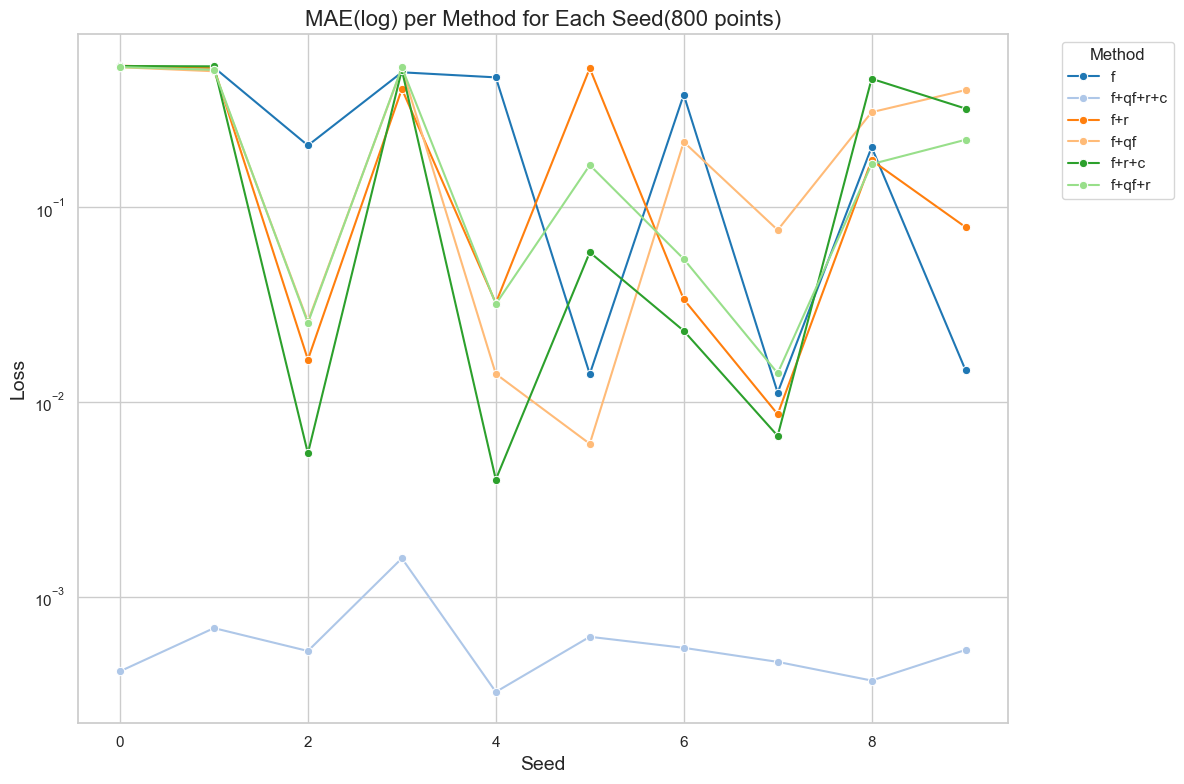

In [37]:
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

dd = pd.DataFrame(data)

# 确保方法按指定顺序排序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)



# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=dd, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')

# 设置纵坐标为对数尺度
plt.yscale('log')

# 3. 设置图形标题和标签
plt.title('MAE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

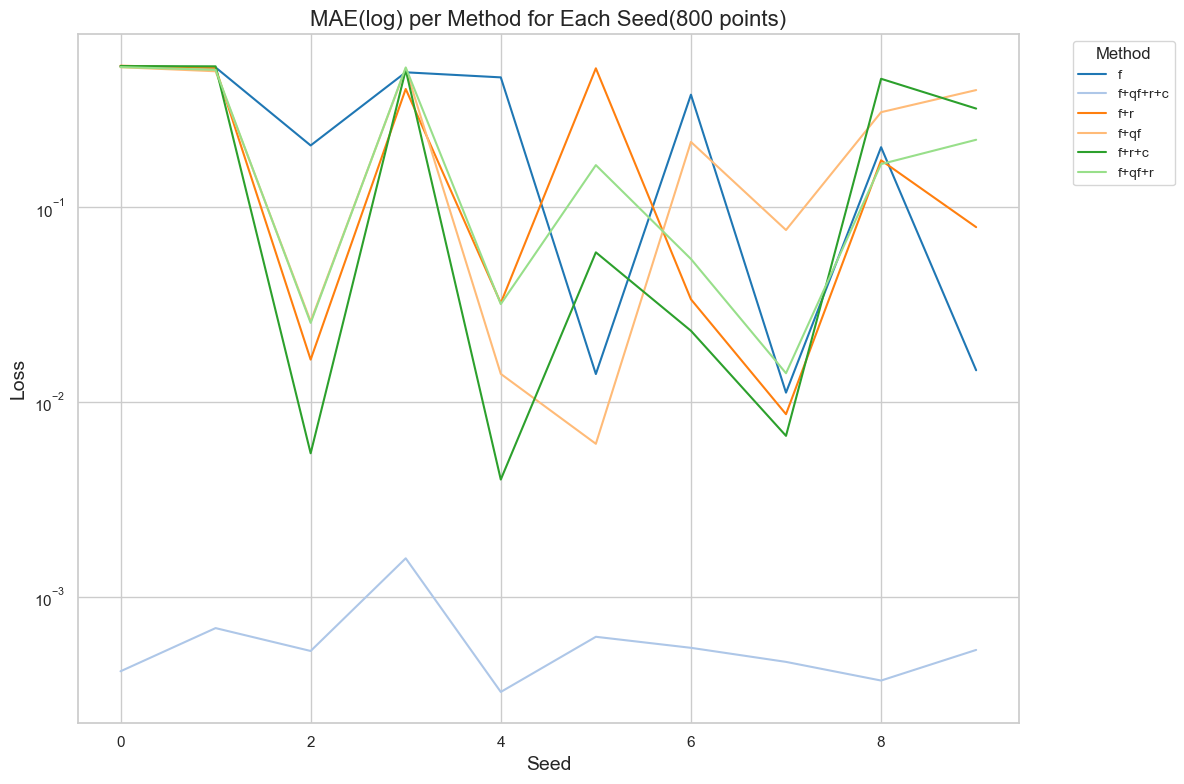

In [38]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'Residual', 'Active']
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = dd[dd['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )


# 设置纵坐标为对数尺度
plt.yscale('log')

# 4. 设置图形标题和标签
plt.title('MAE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

C:\Users\lcy\AppData\Local\Temp\ipykernel_232228\822122591.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


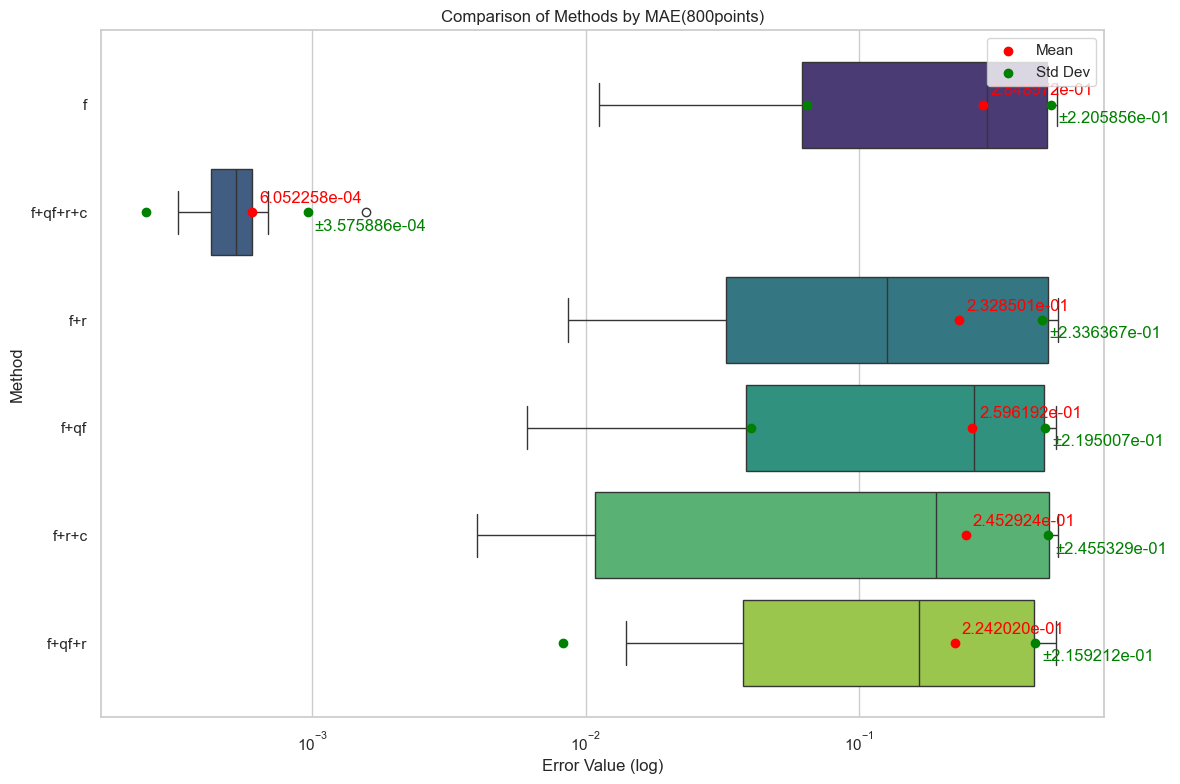

In [39]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


dd = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 8))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.6e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.6e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by MAE(800points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

C:\Users\lcy\AppData\Local\Temp\ipykernel_232228\2556958130.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


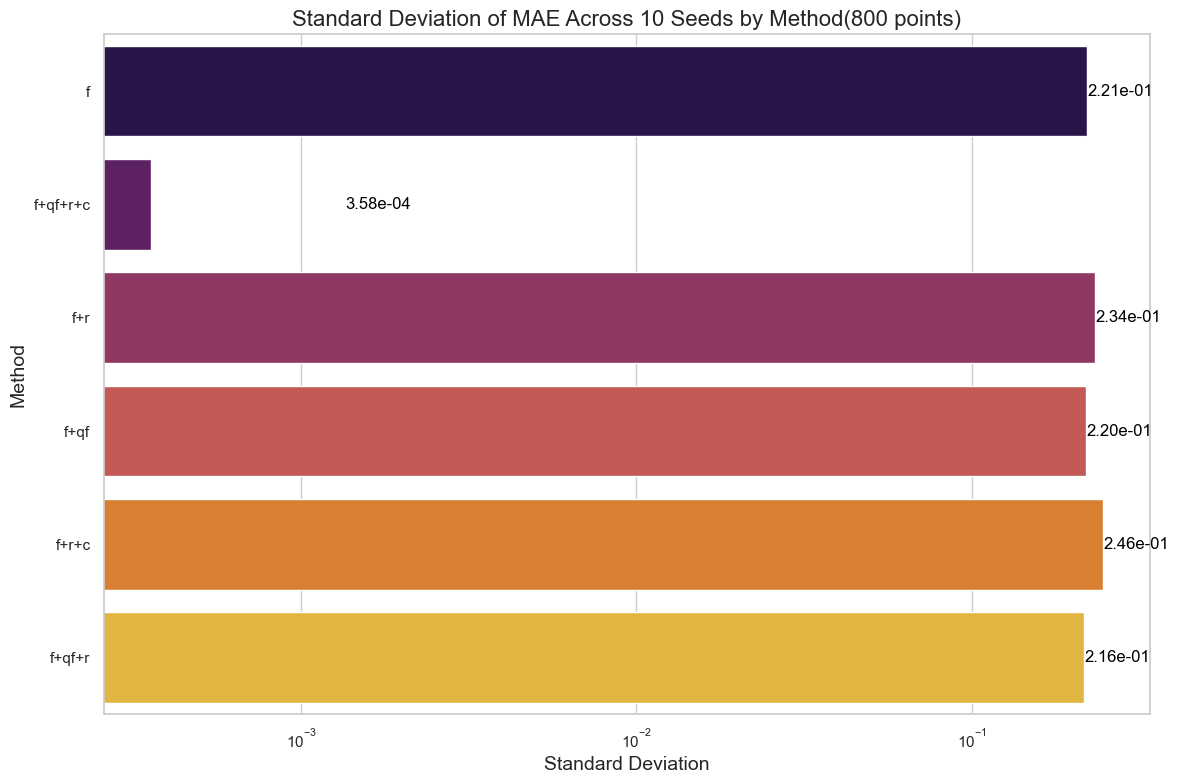

In [40]:
# 计算每种方法在10个seed下的标准差
std_df = dd.groupby('Method')['Values'].std().reset_index()
std_df.rename(columns={'Values': 'Std Dev'}, inplace=True)
# 创建图像
plt.figure(figsize=(12, 8))
# 使用 Seaborn 绘制标准差柱状图
sns.barplot(
    x='Std Dev',
    y='Method',
    data=std_df,
    palette="inferno",
    orient='h'
)

plt.xscale('log')

# 添加标题和轴标签
plt.title('Standard Deviation of MAE Across 10 Seeds by Method(800 points)', fontsize=16)
plt.xlabel('Standard Deviation', fontsize=14)
plt.ylabel('Method', fontsize=14)
# 显示标准差值
for index, row in std_df.iterrows():
    plt.text(
        row['Std Dev'] + 0.001,  # 偏移值用于使文字避开柱状图
        index,
        f'{row["Std Dev"]:.2e}',
        color='black',
        va='center',
        fontsize=12
    )
# 调整布局
plt.tight_layout()
# 显示图像
plt.show()

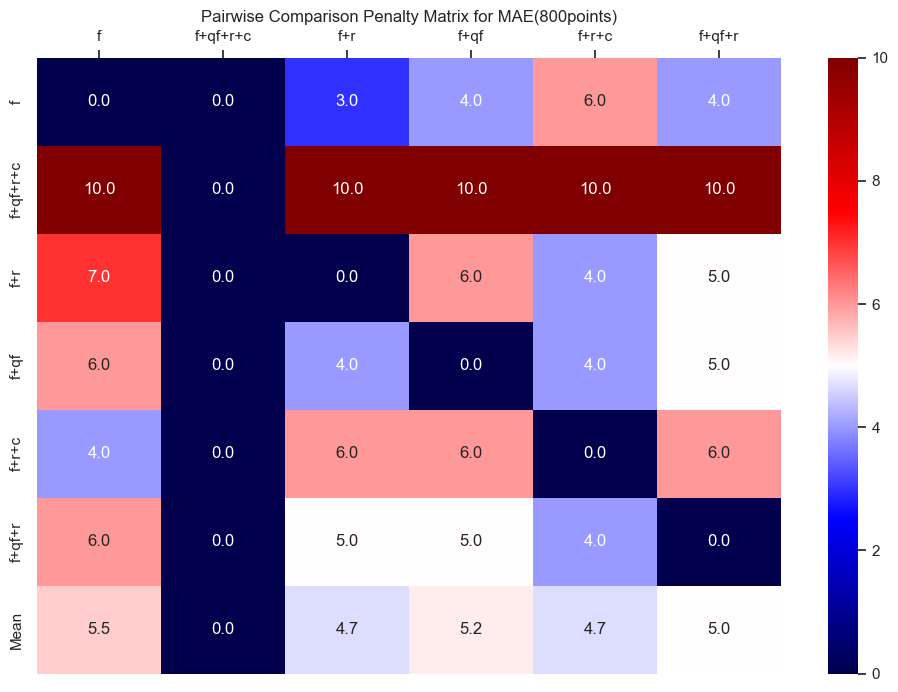

In [41]:
# 初始化惩罚矩阵
n_methods = len(methods)
penalty_matrix = np.zeros((n_methods, n_methods))

# 计算惩罚矩阵
for i, method_i in enumerate(methods):
    for j, method_j in enumerate(methods):
        if i != j:
            for k in range(len(loss_values[method_i])):
                if loss_values[method_i][k] < loss_values[method_j][k]:
                    penalty_matrix[i, j] += 1

# 计算列平均值
column_means = np.mean(penalty_matrix, axis=0)

# 添加列平均值到惩罚矩阵的底部
penalty_matrix_with_means = np.vstack([penalty_matrix, column_means])

# 创建热图
plt.figure(figsize=(12, 8))
ax = sns.heatmap(penalty_matrix_with_means, annot=True, fmt=".1f", cmap="seismic", xticklabels=methods, yticklabels=methods + ['Mean']) #cmap是颜色映射，annot是是否显示数值，fmt是数值格式

# 将x轴标签移动到顶部
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('Pairwise Comparison Penalty Matrix for MAE(800points)')
# plt.xlabel('Methods')
# plt.ylabel('Methods')
plt.show()


In [42]:
# 筛选出 Metric 为 "Error_u" 的数据
error_u_df = df[df["Metric"] == "MSE"]

# 转换为字典格式
loss_values = {row["Method"]: row["Values"] for _, row in error_u_df.iterrows()}

# 显示结果
methods = list(loss_values.keys())
seeds = range(len(next(iter(loss_values.values()))))

seeds = range(10)

print("Methods:", methods)
print("Seeds:", seeds)
print("Loss Values:", loss_values)

Methods: ['f', 'f+qf+r+c', 'f+r', 'f+qf', 'f+r+c', 'f+qf+r']
Seeds: range(0, 10)
Loss Values: {'f': [0.43855498662192666, 0.43319952783003773, 0.16129867516171828, 0.4007472831002128, 0.37322814481801997, 0.002134388995047845, 0.2915204239524202, 0.0013983027448985941, 0.12795068715257932, 0.009629380563195648], 'f+qf+r+c': [2.315943454645556e-06, 8.695663951320436e-06, 2.75849940949375e-06, 1.2878302217731222e-05, 1.2824069901346807e-06, 1.4189823503238834e-06, 1.168498145705158e-06, 2.320806668764929e-06, 8.248195609039247e-07, 7.417623396246443e-07], 'f+r': [0.4427327258171475, 0.42604182464860363, 0.007119014557120699, 0.3195013437429983, 0.010158146431238687, 0.4213141925844529, 0.012055490943439983, 0.0010838799244768467, 0.12476379918049499, 0.055857345804503945], 'f+qf': [0.43434268554608885, 0.41569072607205565, 0.01042178368085958, 0.42315232540452563, 0.0036359036365927275, 0.0004363892486994806, 0.14597278442085282, 0.030563798596038534, 0.2212991320209463, 0.29721602790320

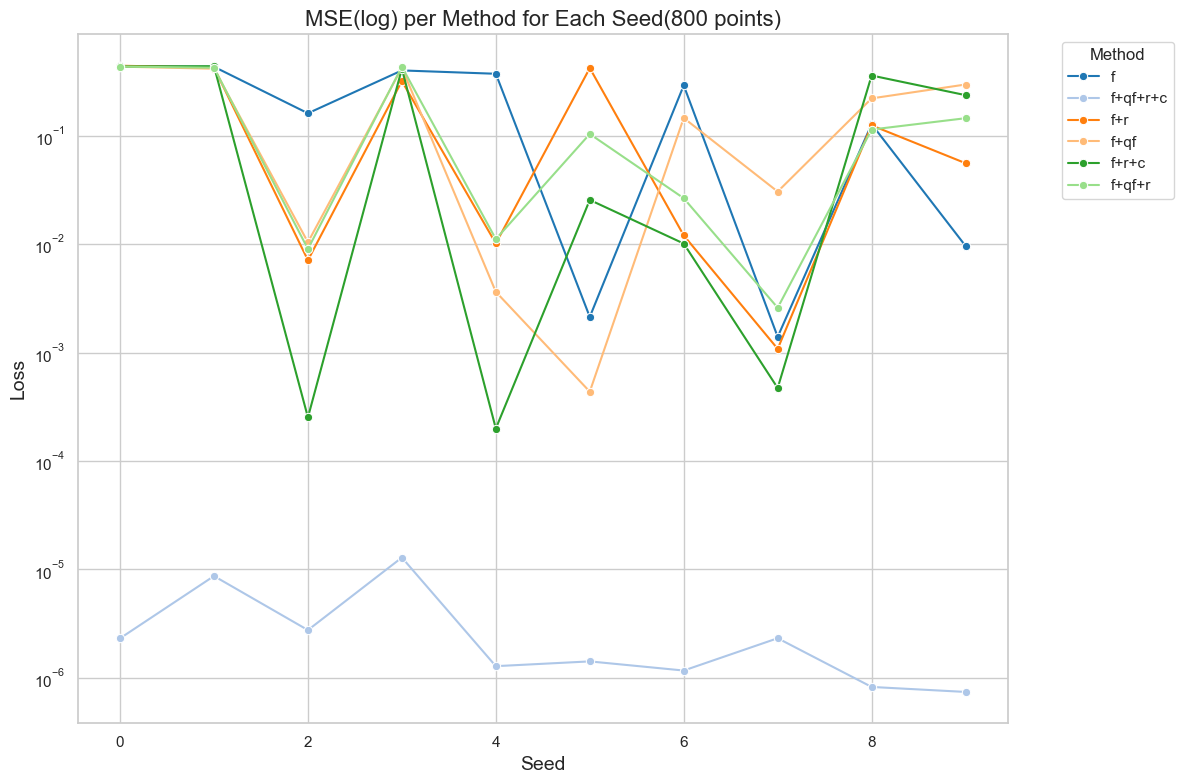

In [43]:
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

dd = pd.DataFrame(data)

# 确保方法按指定顺序排序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=dd, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')



# 设置纵坐标为对数尺度
plt.yscale('log')

# 3. 设置图形标题和标签
plt.title('MSE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

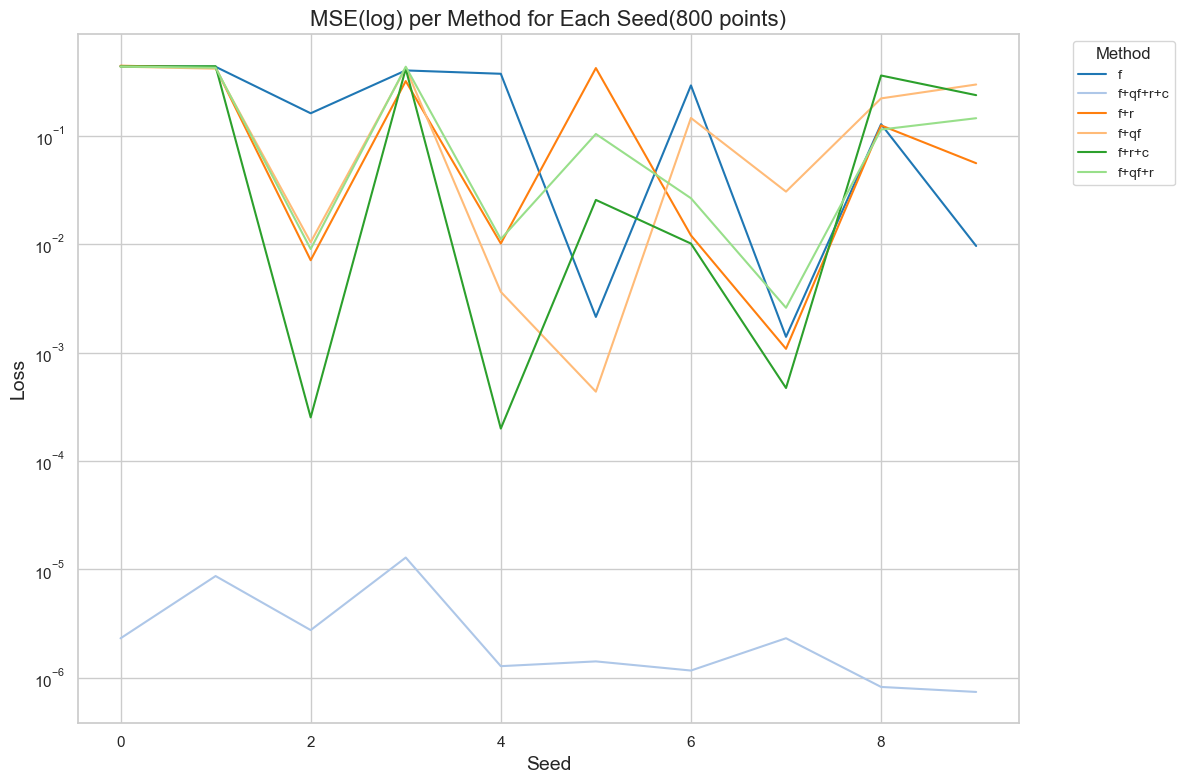

In [44]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'Residual', 'Active']
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = dd[dd['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )


# 设置纵坐标为对数尺度
plt.yscale('log')

# 4. 设置图形标题和标签
plt.title('MSE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

C:\Users\lcy\AppData\Local\Temp\ipykernel_232228\2163168095.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


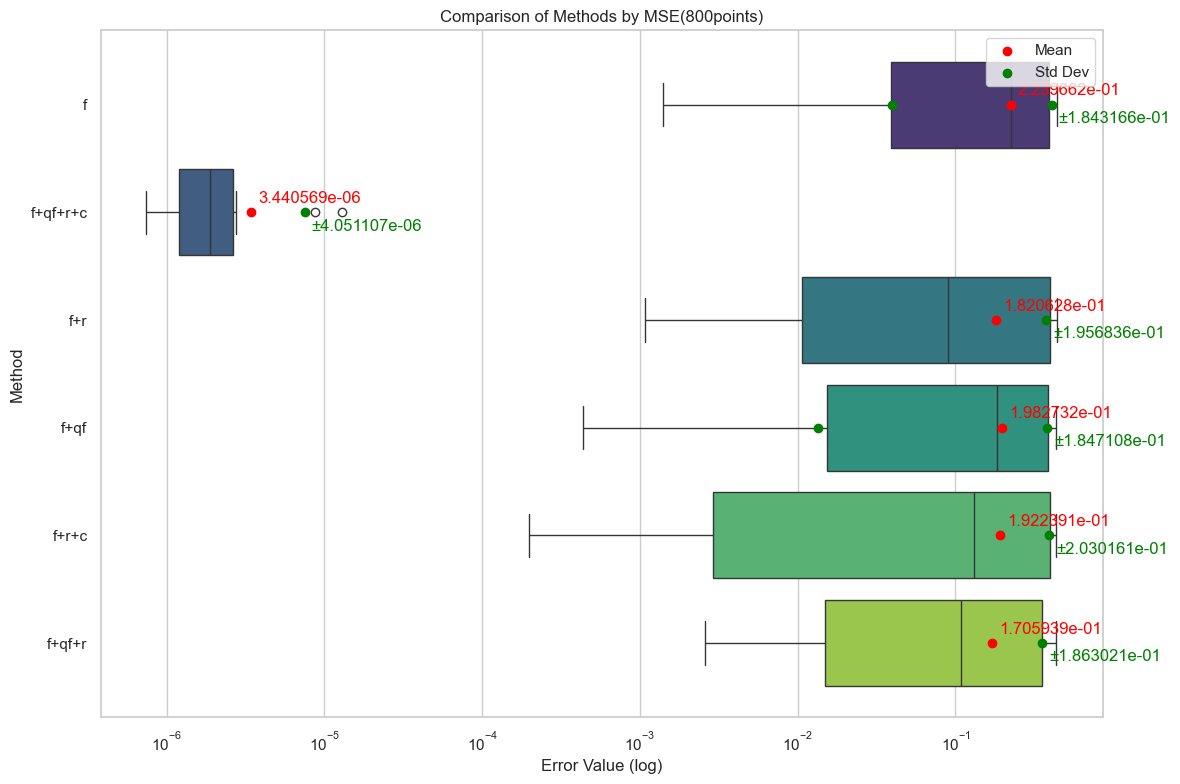

In [45]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


dd = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 8))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.6e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.6e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by MSE(800points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

In [46]:
np.sqrt(2.889226e-06)

0.0016997723376970223